# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [18]:
#libraries
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA


In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

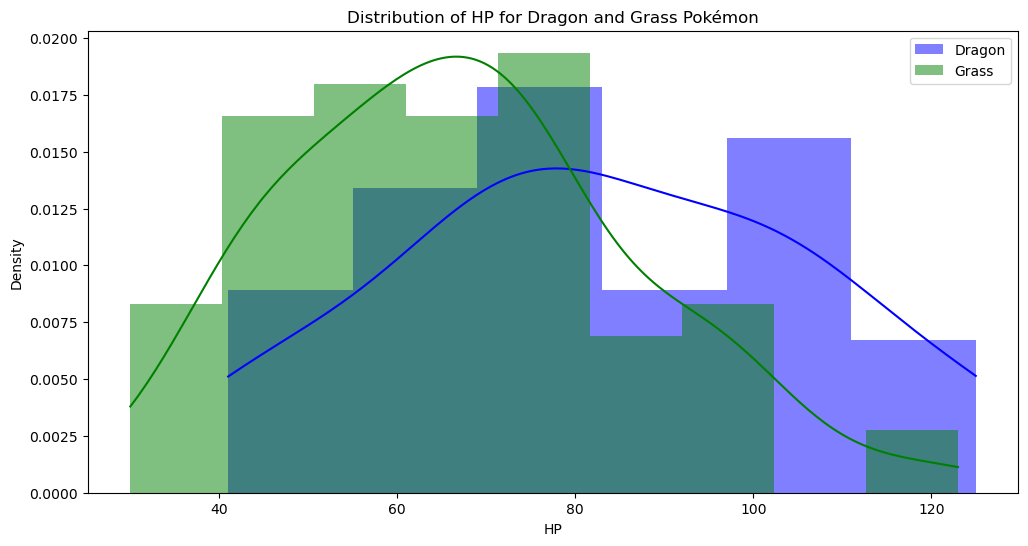

(3.3349632905124063, 0.0015987219490841199)

In [16]:
# Filter the data for Dragon and Grass types
dragon_pokemon = df[df['Type 1'] == 'Dragon']['HP']
grass_pokemon = df[df['Type 1'] == 'Grass']['HP']

# 1. Plot histograms to visually assess normality
plt.figure(figsize=(12, 6))
sns.histplot(dragon_pokemon, kde=True, color='blue', label='Dragon', stat="density", linewidth=0)
sns.histplot(grass_pokemon, kde=True, color='green', label='Grass', stat="density", linewidth=0)
plt.legend()
plt.title('Distribution of HP for Dragon and Grass Pokémon')
plt.show()

# 2. Perform the independent two-sample t-test
t_stat, p_value = ttest_ind(dragon_pokemon.dropna(), grass_pokemon.dropna(), equal_var=False)  # Welch's t-test (unequal variance)

# 3. Print the results
t_stat, p_value

- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [58]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")

df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [74]:
# Print out the column names to identify any discrepancies
print(df.columns)

Index(['Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [76]:
# Set new column names directly
df.columns = ['Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']

# Print the updated column names
print(df.columns)

Index(['Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [80]:
from statsmodels.multivariate.manova import MANOVA

# Prepare the data for MANOVA (make sure 'Legendary' is categorical and columns are named correctly)
manova_data = df[stats_columns + ['Legendary']]

# Perform the MANOVA test directly
manova = MANOVA.from_formula('HP + Attack + Defense + Sp_Atk + Sp_Def + Speed ~ Legendary', data=manova_data)
manova_result = manova.mv_test()  # This is the correct method to call

# Print the summary of the results
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0592 6.0000 793.0000 2100.8338 0.0000
         Pillai's trace  0.9408 6.0000 793.0000 2100.8338 0.0000
 Hotelling-Lawley trace 15.8953 6.0000 793.0000 2100.8338 0.0000
    Roy's greatest root 15.8953 6.0000 793.0000 2100.8338 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Legendary        Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7331 6.0000 793.0000 48.1098 0.0000
            Pillai's trace 0.2669 6.0000 793.

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 37)
- Hospital coordinates (-122, 34)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [82]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")

# Coordinates for school and hospital
school_coords = (-118, 37)
hospital_coords = (-122, 34)

# Function to calculate Euclidean distance
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# Apply the distance function for each house
df['distance_to_school'] = df.apply(lambda row: calculate_distance(row['longitude'], row['latitude'], school_coords[0], school_coords[1]), axis=1)
df['distance_to_hospital'] = df.apply(lambda row: calculate_distance(row['longitude'], row['latitude'], hospital_coords[0], hospital_coords[1]), axis=1)

# Define the 'close' and 'far' groups based on distance threshold
threshold = 0.50
df['close_to_school_or_hospital'] = df.apply(lambda row: 1 if (row['distance_to_school'] < threshold or row['distance_to_hospital'] < threshold) else 0, axis=1)

# Divide into two groups
close_houses = df[df['close_to_school_or_hospital'] == 1]
far_houses = df[df['close_to_school_or_hospital'] == 0]

# Perform t-test to compare the means of house prices
t_stat, p_value = ttest_ind(close_houses['median_house_value'], far_houses['median_house_value'], equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in house prices between houses close and far from a school or hospital.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in house prices between houses close and far from a school or hospital.")

T-statistic: -17.174167998688404
P-value: 5.220018561223529e-05
Reject the null hypothesis: There is a significant difference in house prices between houses close and far from a school or hospital.
